In [92]:
import pandas as pd
import numpy as np
import time
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.metrics import roc_auc_score
import pickle
from random import sample 

In [3]:
data = pd.read_sas('/home/guangya/Downloads/wnv_2245new.sas7bdat') 

In [4]:
prep_data = data[['hexid','preci','yr','weeks','precilag1','precilag2','precilag3','precilag4']]

In [144]:
prep_data[prep_data.preci > 100]

,hexid,preci,yr,weeks,precilag1,precilag2,precilag3,precilag4,label,CountyName
145,1.0,116.407194,2011.0,23.0,48.306366,79.847630,16.666267,11.771475,1,0
417,2.0,111.498040,2010.0,31.0,77.268780,17.237670,22.632872,26.355240,2,0
433,2.0,128.676515,2011.0,23.0,49.803725,87.276747,15.996013,19.401741,2,0
705,3.0,110.871960,2010.0,31.0,76.425720,18.777950,22.187619,25.723330,2,0
721,3.0,129.100177,2011.0,23.0,49.801844,85.957305,15.805307,22.200400,2,0
993,4.0,112.218800,2010.0,31.0,75.596780,20.543320,21.026771,26.179510,2,0
1009,4.0,129.815568,2011.0,23.0,49.426890,82.242523,15.745336,23.837391,1,0
1281,5.0,113.553270,2010.0,31.0,74.790240,22.324590,19.859072,26.631260,2,0
1297,5.0,130.534622,2011.0,23.0,49.056132,78.534398,15.686084,25.492305,2,0
1569,6.0,114.181140,2010.0,31.0,75.101850,23.565700,20.229674,27.003300,1,0


In [12]:
county_data = pd.read_csv('/home/guangya/Downloads/County_Hex_data.csv')

In [28]:
s_a = set(prep_data.hexid.unique())

In [30]:
s_b = set(county_data[county_data.hexid.isin(prep_data.hexid.unique())].hexid.unique())

In [46]:
new_list = sorted(list(s_a-s_b))

In [47]:
for i in range(10):
    if i <= 2:
        new_list[i] = [new_list[i],0]
    else:
        new_list[i] = [new_list[i],1]

In [57]:
new_list = pd.DataFrame(new_list,columns=['hexid','CountyName']).set_index('hexid')

In [49]:
county_data_cleaned = county_data[county_data.hexid.isin(prep_data.hexid.unique())].drop_duplicates(subset = 'hexid',keep = 'first').set_index('hexid')

In [64]:
county_data_cleaned.loc[county_data_cleaned.CountyName == 'Cook County','CountyName'] = 0

In [68]:
county_data_cleaned.loc[county_data_cleaned.CountyName == 'DuPage County','CountyName'] = 1

In [71]:
county_data_final = county_data_cleaned.append(new_list)

In [ ]:
prep_data_final = pd.merge(prep_data,county_data_final,left_on='hexid',right_index=True)

In [116]:
prep_data_final_2231 = prep_data_final[prep_data_final.weeks <= 31]

In [147]:
prep_data = prep_data_final

In [148]:
cook_prep = prep_data[prep_data.CountyName == 0]
dp_prep = prep_data[prep_data.CountyName == 1]

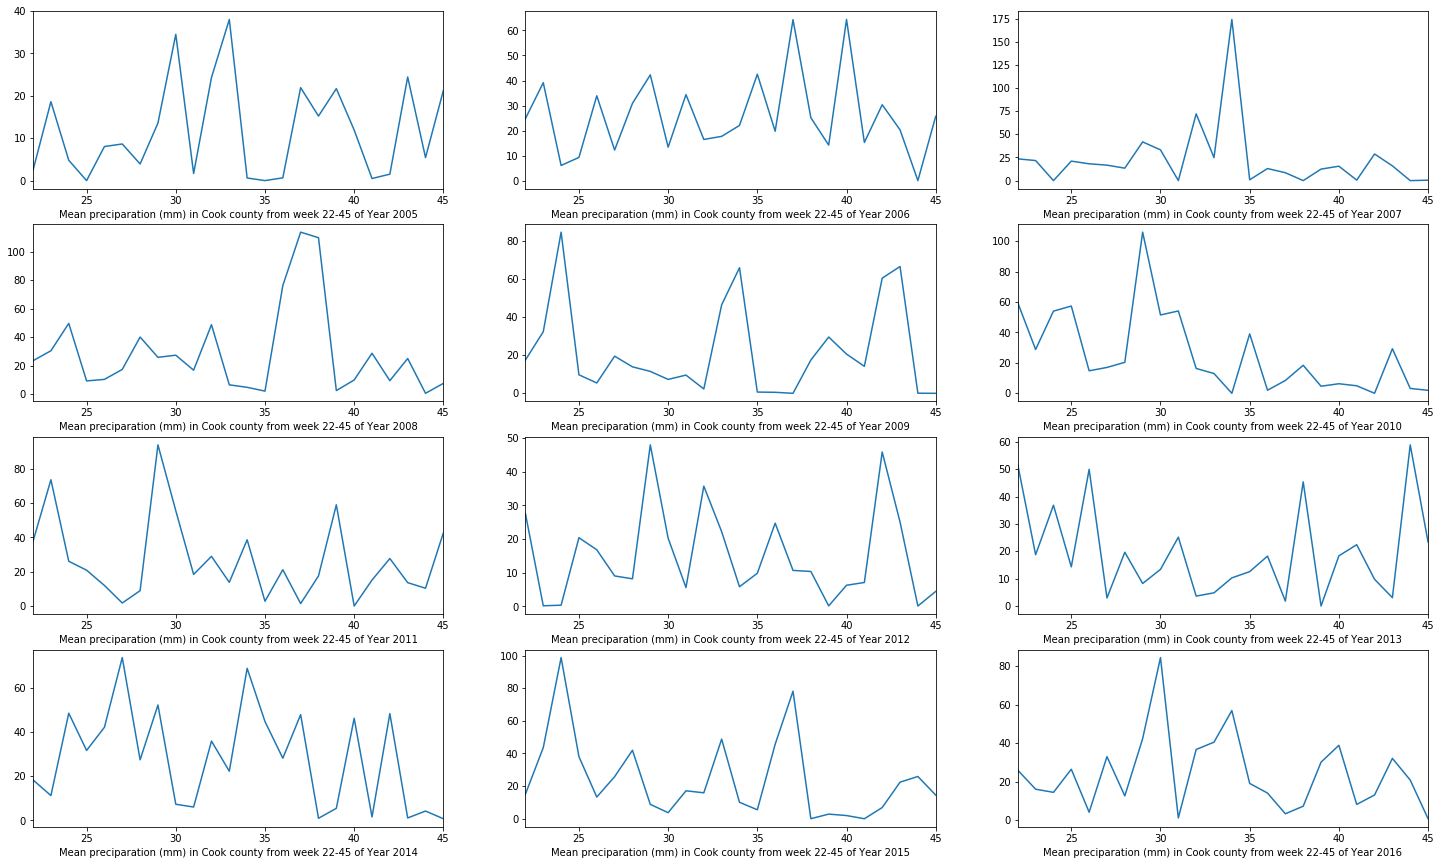

In [149]:
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(25,15))
x = 0
y = 0
for i in range(12):
    cook_prep_yr = cook_prep[cook_prep.yr == i+2005]
    prec = cook_prep_yr.groupby('weeks')['preci'].mean()
    prec.index.rename('Mean preciparation (mm) in Cook county from week 22-45 of Year ' + str(i+2005),inplace = True)
    prec.plot.line(ax = axes[x,y])
    y += 1
    if(y >= 3):
        x += 1
        y = 0
plt.savefig('2245cook.png')

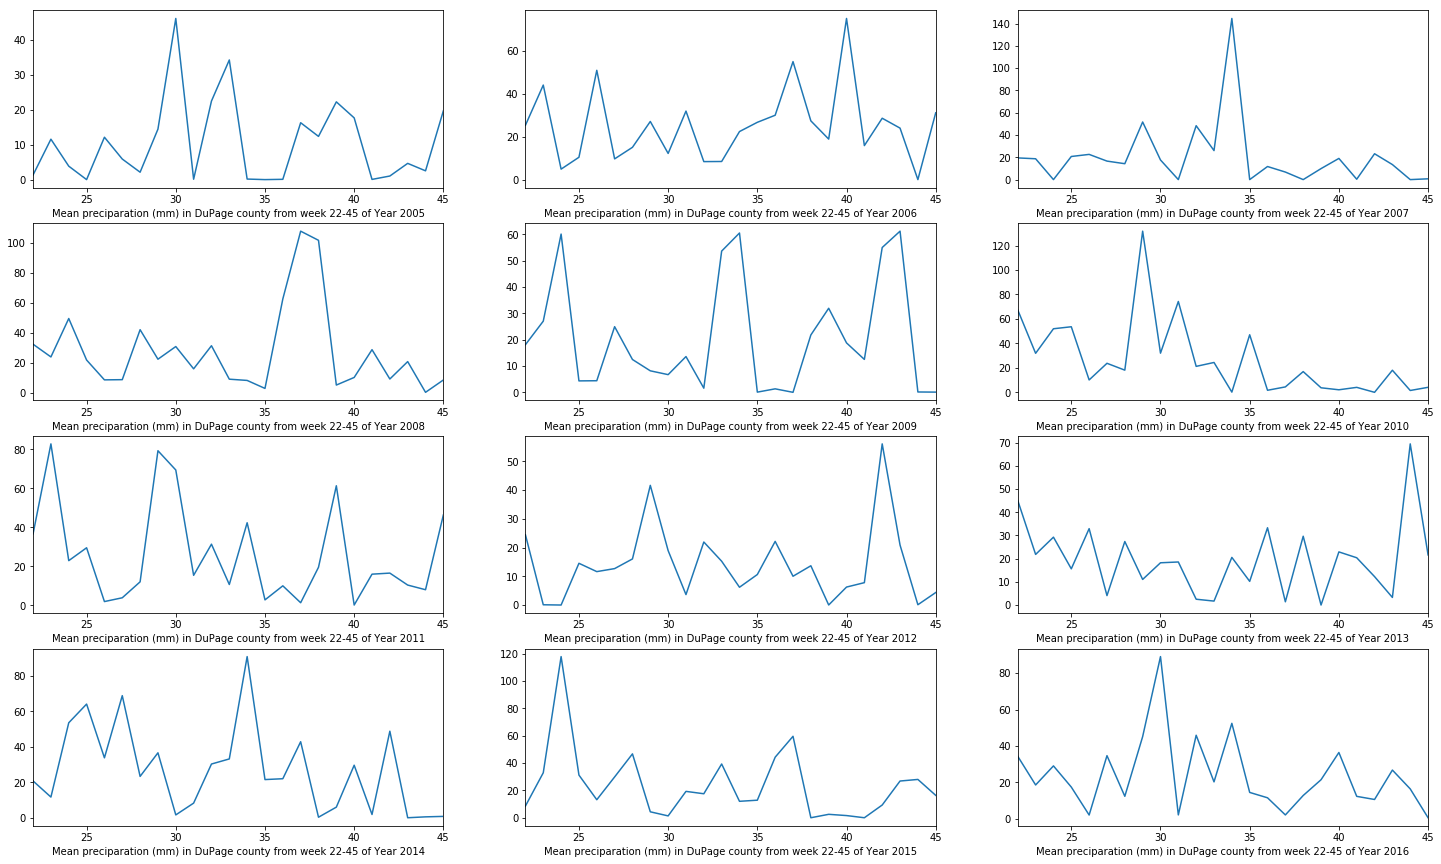

In [150]:
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(25,15))
x = 0
y = 0
for i in range(12):
    dp_prep_yr = dp_prep[dp_prep.yr == i+2005]
    prec = dp_prep_yr.groupby('weeks')['preci'].mean()
    prec.index.rename('Mean preciparation (mm) in DuPage county from week 22-45 of Year ' + str(i+2005),inplace = True)
    prec.plot.line(ax = axes[x,y])
    y += 1
    if(y >= 3):
        x += 1
        y = 0
plt.savefig('2231dupage.png')